# **Exploratory Data Analysis** - *Food & Calories*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings as w
w.filterwarnings('ignore')

In [46]:
# ANSI escape codes for bold text and resetting formatting
BOLD = "\033[1m"
RESET = "\033[0m"

### Import the dataset & Analyze it

In [133]:
data = pd.read_csv("Food and Calories - Sheet1.csv")

data.sample(10)

,Food,Serving,Calories
441,Spinach Feta Pizza,1 slice (62 g),150 cal
338,French Vanilla Ice Cream,1 scoop (72 g),145 cal
547,Spicy Italian,1 sandwich (219 g),480 cal
130,Chicken Caesar Salad,1 salad (309 g),392 cal
497,Bratwurst,1 piece (85 g),283 cal
126,Brown Rice,1 cup (185 g),670 cal
115,Tangerine,1 tangerine (88 g),47 cal
159,Macaroni and Cheese,1 serving (189 g),699 cal
150,Fried Rice,1 serving (356 g),662 cal
429,Pepperoni Pizza,1 slice (71 g),181 cal


In [129]:
data.describe

<bound method NDFrame.describe of                          Food              Serving Calories
0                   Artichoke  1 artichoke (128 g)   60 cal
1                     Arugula         1 leaf (2 g)    1 cal
2                   Asparagus       1 spear (12 g)    2 cal
3                   Aubergine  1 aubergine (458 g)  115 cal
4                    Beetroot        1 beet (82 g)   35 cal
..                        ...                  ...      ...
557  Wendy’s Jr. Cheeseburger     1 burger (129 g)  290 cal
558  Wendy’s Son of Baconator     1 burger (218 g)  700 cal
559                   Whopper     1 burger (291 g)  672 cal
560                    Zinger   1 sandwich (202 g)  517 cal
561             Zinger Burger   1 sandwich (202 g)  517 cal

[562 rows x 3 columns]>

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      562 non-null    object
 1   Serving   562 non-null    object
 2   Calories  562 non-null    object
dtypes: object(3)
memory usage: 13.3+ KB


### Working on the data formats on columns 'Serving' & 'Calories'

In [134]:
# Extract Serving Quantity as a Feature ..
data['ServingQuantity (g)'] = data['Serving'].apply(lambda x:x.split('(')[1][:-3])
data['ServingQuantity (g)'] = data['ServingQuantity (g)'].apply(lambda x:x.split()[0])

# Cleaning the Feature - Serving ..
data['Serving'] = data['Serving'].apply(lambda x:x.split('(')[0])

# Cleaning the Feature - Calories ..
data['Calories'] = data['Calories'].apply(lambda x:x.split()[0])

data.head(10)

,Food,Serving,Calories,ServingQuantity
0,Artichoke,1 artichoke,60,128
1,Arugula,1 leaf,1,2
2,Asparagus,1 spear,2,12
3,Aubergine,1 aubergine,115,458
4,Beetroot,1 beet,35,82
5,Bell Pepper,1 pepper,15,73
6,Black Olives,1 olive,2,2.7
7,Broccoli,1 bunch,207,608
8,Brussels Sprouts,1 sprout,8,19
9,Cabbage,1 head,227,908


### Reindexing the last two columns

In [136]:
data = data.reindex(columns = ['Food', 'Serving', 'ServingQuantity', 'Calories'])

In [137]:
data.head(2)

,Food,Serving,ServingQuantity,Calories
0,Artichoke,1 artichoke,128,60
1,Arugula,1 leaf,2,1


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Food             562 non-null    object
 1   Serving          562 non-null    object
 2   ServingQuantity  562 non-null    object
 3   Calories         562 non-null    object
dtypes: object(4)
memory usage: 17.7+ KB


### Checking the data formats of the features containing numbers to convert them from `str` to `int` or `float`. And converting if required.

In [139]:
def check_int_float(strings, numeric_list = False):
    results = [
        int(s) if s.isdigit() or (s.startswith('-') and s[1:].isdigit()) else 
        float(s) if '.' in s and all(part.isdigit() for part in s.replace('-', '').split('.', 1)) else 
        str(s) 
        for s in strings
    ]
    counts = {
        'int': sum(1 for item in results if isinstance(item, int) and not isinstance(item, bool)),
        'float': sum(1 for item in results if isinstance(item, float)),
        'str': sum(1 for item in results if isinstance(item, str))
    }
    if numeric_list == True:
        return counts, results
    return counts

In [140]:
for feature_name, features in data.items():
    print(f"Data types found in {feature_name} : {BOLD}{check_int_float(features.tolist())}{RESET}")

Data types found in Food : {'int': 0, 'float': 0, 'str': 562}
Data types found in Serving : {'int': 0, 'float': 0, 'str': 562}
Data types found in ServingQuantity : {'int': 546, 'float': 16, 'str': 0}
Data types found in Calories : {'int': 562, 'float': 0, 'str': 0}


We can see we now need to convert the data type from `obj` to `float` for *`ServingQuantity`* and `int` for *`Calories`*.

In [142]:
data['ServingQuantity'] = data['ServingQuantity'].astype('float')
data['Calories'] = data['Calories'].astype('int')

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Food             562 non-null    object 
 1   Serving          562 non-null    object 
 2   ServingQuantity  562 non-null    float64
 3   Calories         562 non-null    int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 15.5+ KB


<Axes: >

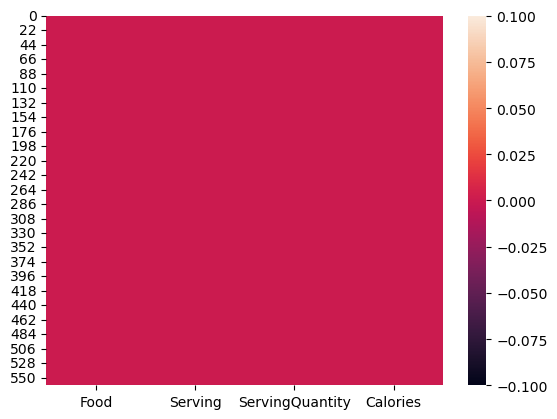

In [144]:
sns.heatmap(data.isnull())

### Checking the NULL, Unique & Duplicate Value Count

In [145]:
print(f"The NULL Values found in the dataset : \n{BOLD}{data.isna().sum()}{RESET}")
print(f"\nThe Unique Values found in the dataset : {BOLD}{data.nunique().sum()}{RESET}")
print(f"\nSummary of Unique Values : \n{BOLD}{data.nunique()}{RESET}")
print(f"\nThe Shape of the dataset : {BOLD}{data.shape}{RESET}")

The NULL Values found in the dataset : 
Food               0
Serving            0
ServingQuantity    0
Calories           0
dtype: int64

The Unique Values found in the dataset : 1251

Summary of Unique Values : 
Food               541
Serving            162
ServingQuantity    241
Calories           307
dtype: int64

The Shape of the dataset : (562, 4)


In [147]:
print(f"\nDuplicate Data found in the dataset : {BOLD}{data.duplicated().sum()}{RESET}")
print(f"\nFound : \n{BOLD}{data[data.duplicated()]}{RESET}")


Duplicate Data found in the dataset : 13

Found : 
               Food         Serving  ServingQuantity  Calories
95           Olives        1 olive               2.7         2
309        Pea Soup          1 cup             253.0       190
453         Avocado      1 avocado             200.0       320
454          Banana       1 banana             125.0       111
464           Guava        1 guava              55.0        37
466       Jackfruit          1 cup             151.0       143
471           Mango        1 mango             336.0       202
478       Pineapple    1 pineapple             905.0       453
481     Pomegranate  1 pomegranate             282.0       234
484        Rambutan     1 rambutan               9.0         7
488        Tamarind     1 tamarind               2.0         5
489      Watermelon        1 wedge             286.0        86
522  Fish and Chips      1 serving             300.0       585


In [150]:
data.describe()

,ServingQuantity,Calories
count,562.000000,562.000000
mean,149.852046,229.669039
std,158.975036,232.303786
min,2.000000,1.000000
25%,56.000000,70.000000
50%,125.000000,160.500000
75%,213.000000,328.500000
max,2301.000000,2209.000000


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Food             562 non-null    object 
 1   Serving          562 non-null    object 
 2   ServingQuantity  562 non-null    float64
 3   Calories         562 non-null    int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 15.5+ KB


### Plotting Histogram

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '−500'),
  Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500')])

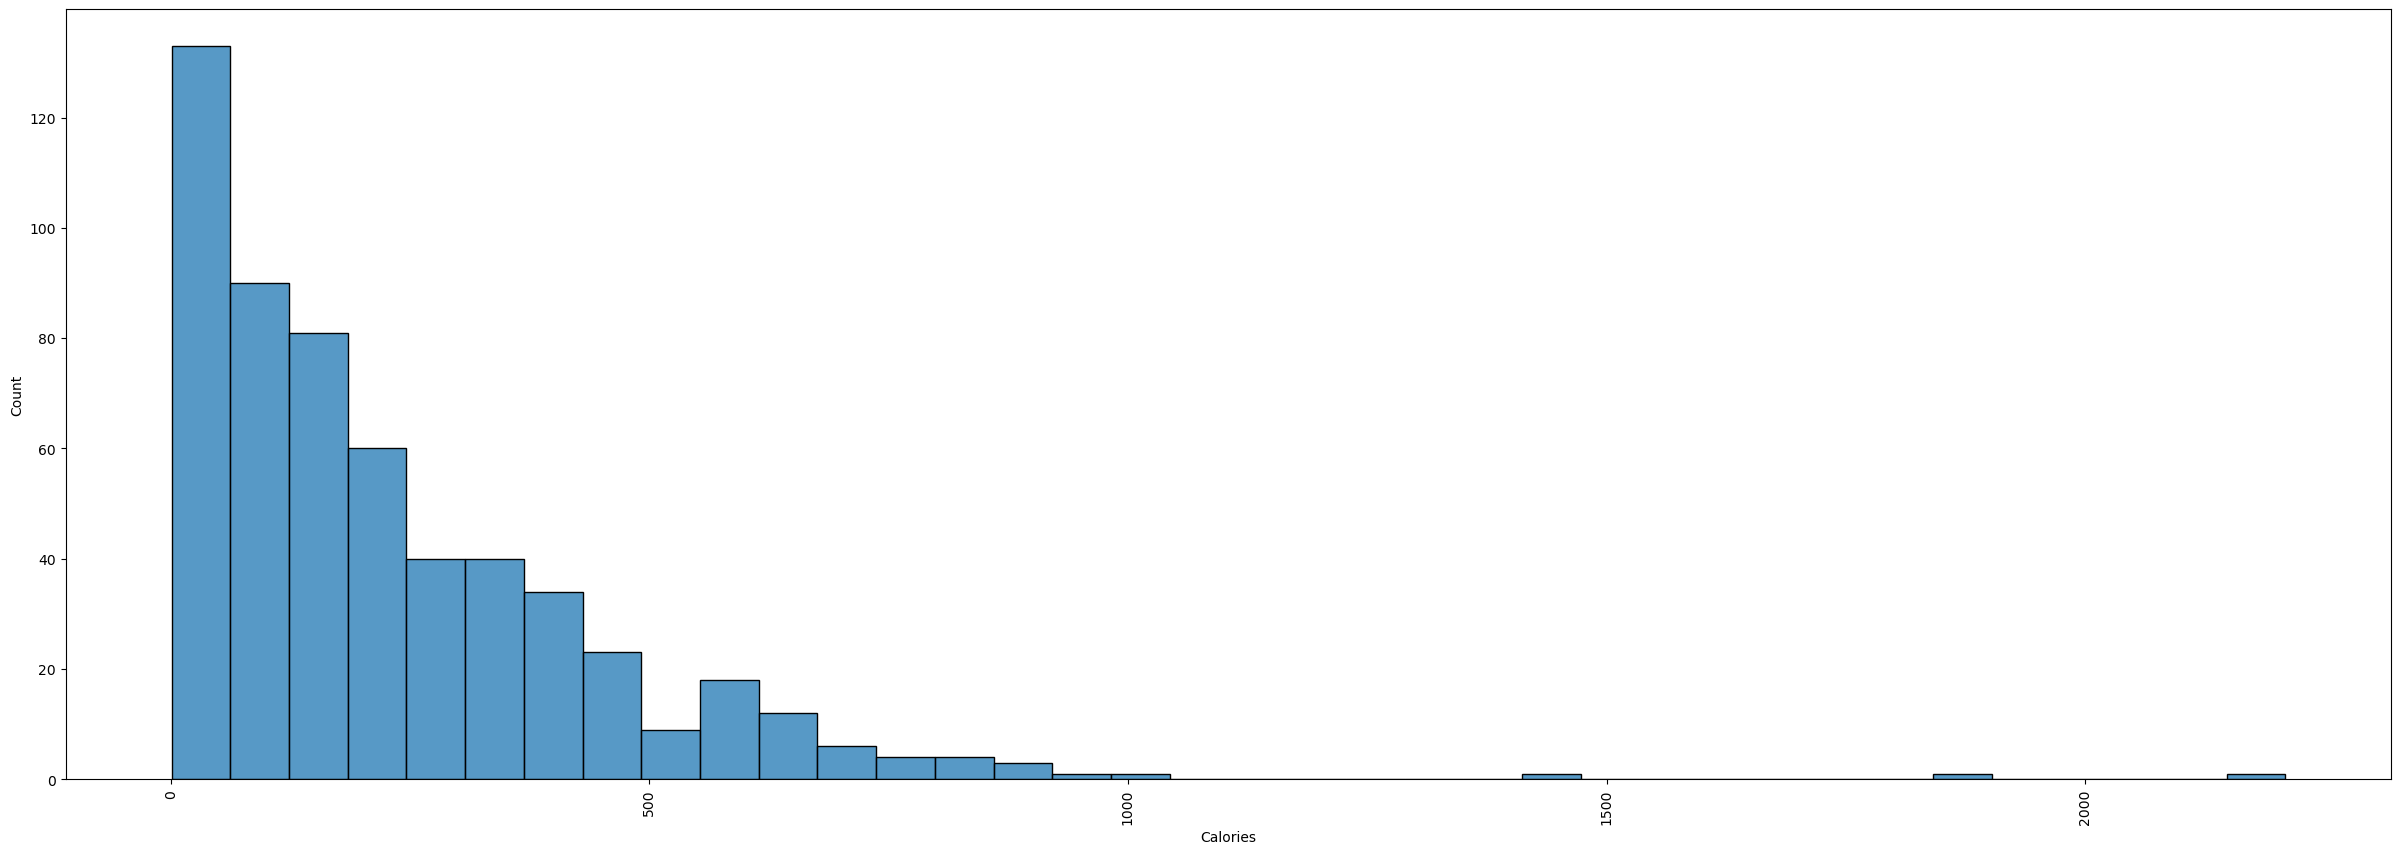

In [152]:
plt.figure(figsize = (30, 10))
sns.histplot(data = data, x = 'Calories')
plt.xlabel('Calories')
plt.ylabel('Count')
plt.xticks(rotation = 90)

### Checking the Feature - *Calories*

In [158]:
print(f"Maximum Calorie found on :\n")
data[data['Calories'] == data['Calories'].max()]

Maximum Calorie found on :



,Food,Serving,ServingQuantity,Calories
132,Chicken Marsala,1 serving,2301.0,2209


In [159]:
print(f"Describing the Calorie Feature : \n{BOLD}{data.Calories.describe()}{RESET}")

Describing the Calorie Feature : 
count     562.000000
mean      229.669039
std       232.303786
min         1.000000
25%        70.000000
50%       160.500000
75%       328.500000
max      2209.000000
Name: Calories, dtype: float64


In [178]:
def display_top_n(n):
    if n > len(data.Calories):
        n = len(data.Calories)
    print(f"Top {n} food items in descending order of their Calorie count : \n{BOLD}{data.sort_values(by = 'Calories', ascending = False)[['Food', 'Calories']].iloc[:n]}{RESET}")

In [180]:
display_top_n(10)

Top 10 food items in descending order of their Calorie count : 
                                       Food  Calories
132                         Chicken Marsala      2209
299                                 Goulash      1887
503              Burger King Triple Whopper      1471
500  Burger King Double Whopper with Cheese       994
554                            Veggie Patty       963
206                                Flaxseed       897
499              Burger King Double Whopper       894
460                                  Durian       885
414                                 Calzone       841
555                       Wendy’s Baconator       839


In [229]:
def plot_bar(n):
    plt.figure(figsize = (20, 10))
    sns.barplot(x = data.sort_values(by = 'Calories', ascending = False)['Food'].iloc[0:n:1].values,
                y = data.sort_values(by = 'Calories', ascending = False)['Calories'].iloc[0:n:1].values,
                data = data[:n],
                palette = sns.color_palette("husl", n))
    plt.xlabel("Food")
    plt.ylabel("Calories")
    plt.title("\nTop " + str(n) + " food items with high calories.\n",  fontsize = 30, fontweight = 'bold')
    plt.xticks(rotation = 90)

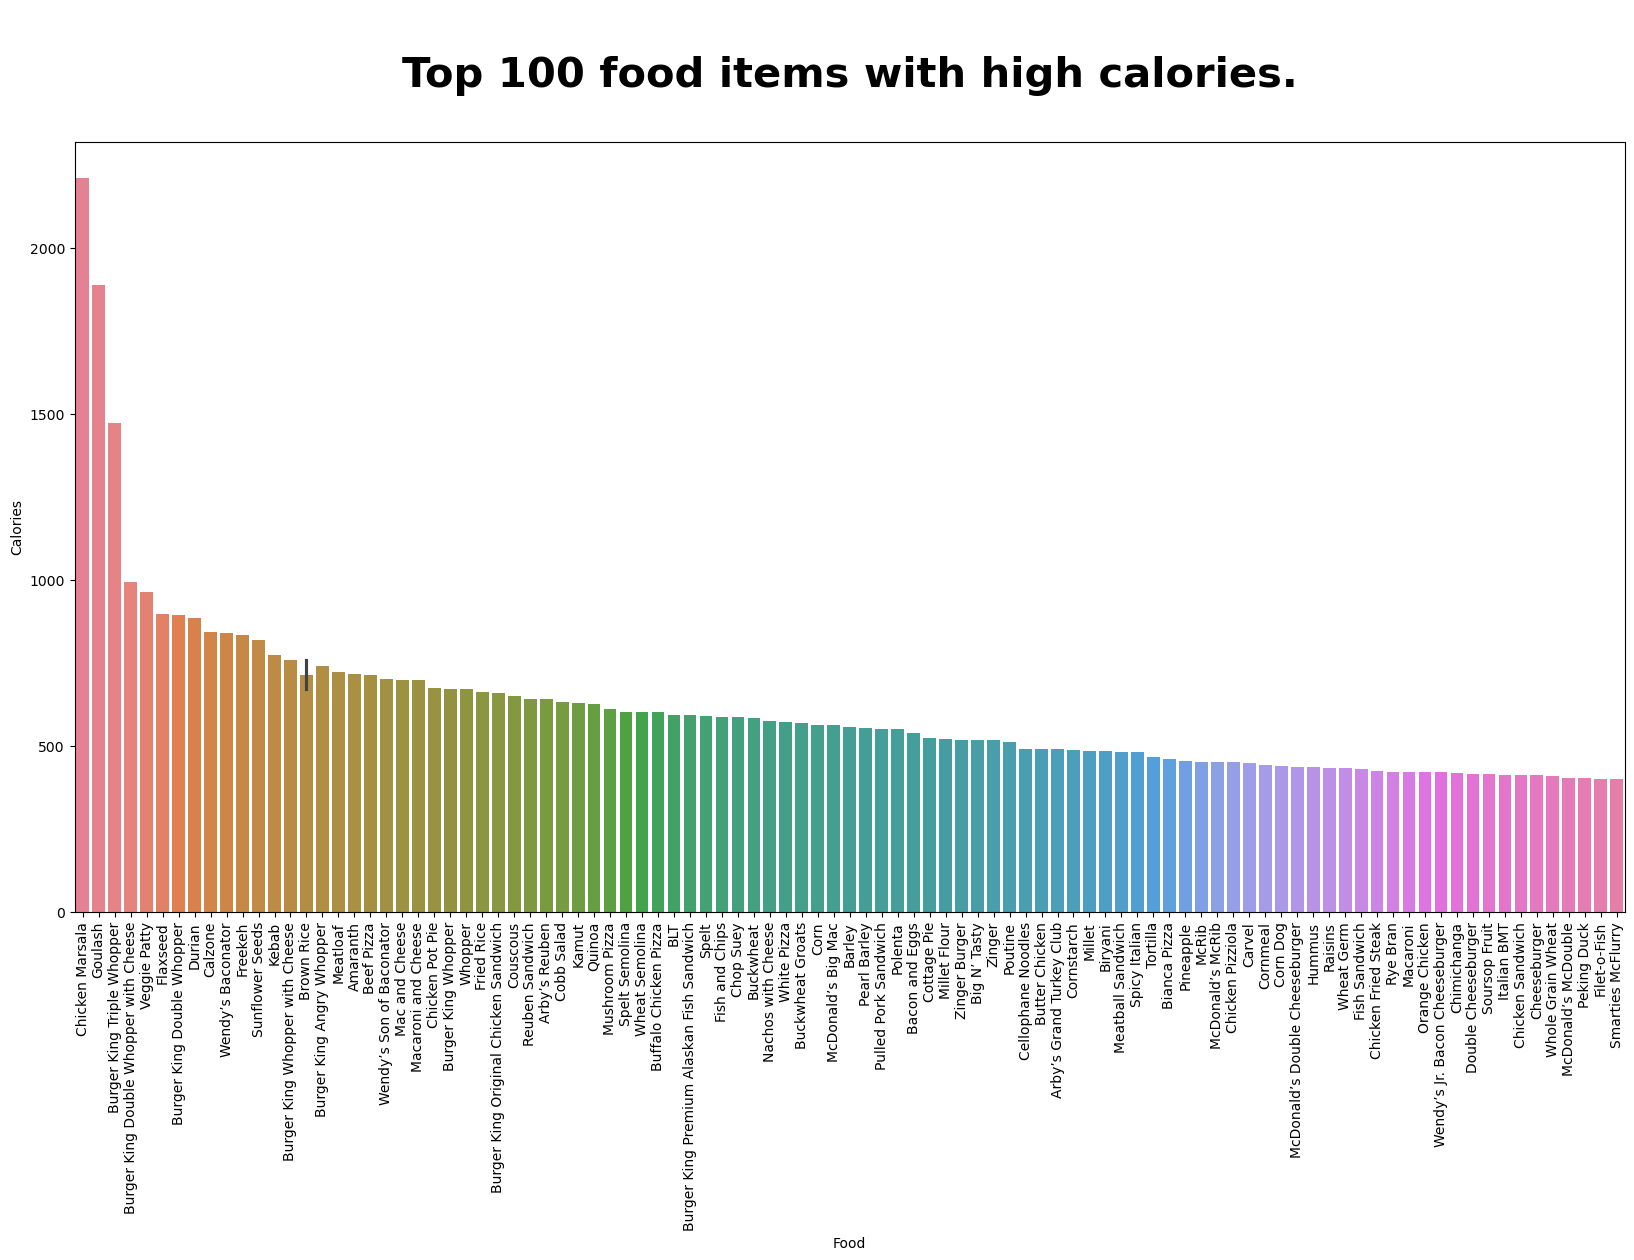

In [230]:
plot_bar(100)

In [246]:
def plot_count(n):
    plt.figure(figsize = (20, 10))
    sns.countplot(x = data.sort_values(by = 'Calories')['Serving'].iloc[:n].values,
                palette = sns.color_palette("husl", n))
    plt.xlabel("Serving")
    plt.ylabel("Count")
    plt.title("\nCount of Serving of top " + str(n) + " food items with high Calories.\n",  fontsize = 30, fontweight = 'bold')
    plt.xticks(rotation = 90)

In [251]:
data.sort_values(by = 'Calories')['Serving'].iloc[:n].head(10)

18     1 tbsp, chopped 
1               1 leaf 
50            1 radish 
451          1 acerola 
39          1 mushroom 
41             1 sheet 
102            1 berry 
31             1 olive 
95             1 olive 
43             1 olive 
Name: Serving, dtype: object

In [256]:
data['Food'][18]

'Chives'

In [257]:
data.sort_values(by = 'Calories')['Food'].iloc[:n].head(10)

18           Chives
1           Arugula
50         Radishes
451         Acerola
39        Mushrooms
41             Nori
102        Physalis
31     Green Olives
95           Olives
43           Olives
Name: Food, dtype: object

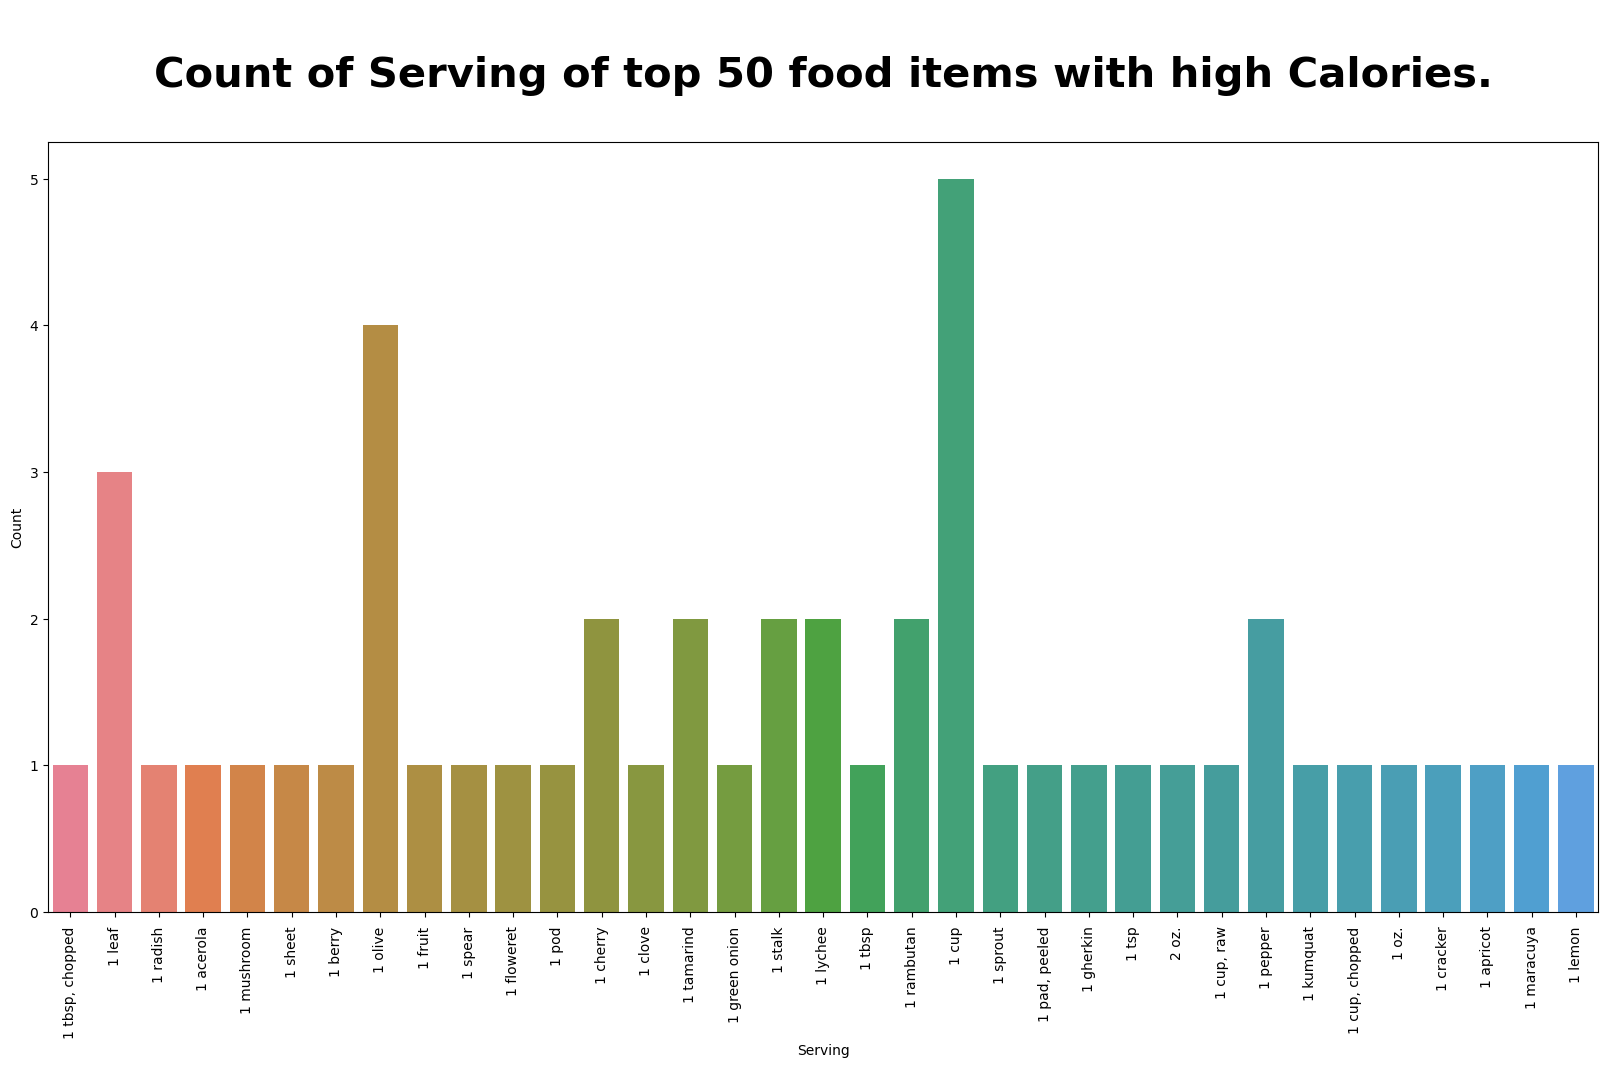

In [247]:
plot_count(50)